# Type B Models Only ipHash, filter_str, port, whereDetected, regexDetected, emptyFilter, label

In [11]:
import sklearn
import pandas
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

In [12]:
data = pandas.read_csv("../Dataset/final.csv")
data.head()

,filter_str,denamed,ipHash,port,whereDetected,regexDetected,emptyFilter,nullArgument,label
0,"{'user': '{}', 'password': '{}'}","{'name': '{}', 'name': '{}'}",2130706433,47038,0,0,0,1,0.0
1,"{'user': '{}', 'password': '{}'}","{'name': '{}', 'name': '{}'}",2130706433,47038,0,0,0,1,0.0
2,{'username': {'$regex': '^{}'}},{'name': {'$regex': '^{}'}},2130706433,47038,0,1,0,1,1.0
3,{'username': {'$regex': '^{}'}},{'name': {'$regex': '^{}'}},2130706433,47038,0,1,0,1,1.0
4,{'username': {'$ne': '{}'}},{'name': {'$ne': '{}'}},2130706433,47038,0,0,0,1,1.0


In [13]:
features = data[data.columns.difference(['label','denamed'])]
target = data['label']
features.head()

,emptyFilter,filter_str,ipHash,nullArgument,port,regexDetected,whereDetected
0,0,"{'user': '{}', 'password': '{}'}",2130706433,1,47038,0,0
1,0,"{'user': '{}', 'password': '{}'}",2130706433,1,47038,0,0
2,0,{'username': {'$regex': '^{}'}},2130706433,1,47038,1,0
3,0,{'username': {'$regex': '^{}'}},2130706433,1,47038,1,0
4,0,{'username': {'$ne': '{}'}},2130706433,1,47038,0,0


In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.sparse import hstack
scaler = MinMaxScaler()
vectScale = MinMaxScaler()
vectorizer = TfidfVectorizer()
featuresVect = vectorizer.fit_transform(features['filter_str'])
featuresNum = data[['ipHash','port','emptyFilter','regexDetected','whereDetected','nullArgument']].values
featuresConcat = hstack((featuresVect, featuresNum))
scaledFeaturesNum = scaler.fit_transform(featuresNum)
scaledFeaturesVect = vectScale.fit_transform(featuresVect.toarray())
scaledFeaturesConcat = hstack((featuresVect,scaledFeaturesNum))

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(featuresConcat, target, test_size=0.2)
X_trainS, X_testS, y_trainS, y_testS = train_test_split(scaledFeaturesConcat, target, test_size=0.2)

In [16]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

svm_A_liner = SVC(kernel="linear",verbose=1)
svm_A_poly = SVC(kernel="poly",verbose=1)
svm_A_rbf = SVC(kernel="rbf",verbose=1)
log_A = LogisticRegression(verbose=1)
randF_A = RandomForestClassifier(verbose=1)
gbc_A = GradientBoostingClassifier(verbose=1)
knn = KNeighborsClassifier(n_neighbors=7)

In [17]:
svm_A_liner.fit(X_trainS,y_trainS)
svm_A_poly.fit(X_trainS,y_trainS)
svm_A_rbf.fit(X_trainS,y_trainS)
log_A.fit(X_train,y_train)
randF_A.fit(X_train,y_train)
gbc_A.fit(X_train,y_train)
knn.fit(X_train,y_train)

[LibSVM]*.*
optimization finished, #iter = 204
obj = -87.056339, rho = -0.137201
nSV = 137, nBSV = 89
Total nSV = 137
[LibSVM]*
optimization finished, #iter = 167
obj = -87.176989, rho = -0.370973
nSV = 151, nBSV = 97
Total nSV = 151
[LibSVM]*
optimization finished, #iter = 156
obj = -84.590088, rho = 0.141150
nSV = 143, nBSV = 97
Total nSV = 143
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          146     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.32391D+02    |proj g|=  1.38496D+10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
  

 This problem is unconstrained.
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s


      Iter       Train Loss   Remaining Time 
         1           1.3189            0.20s
         2           1.2675            0.16s
         3           1.2249            0.14s
         4           1.1880            0.14s
         5           1.1555            0.13s
         6           1.1272            0.12s
         7           1.1010            0.12s
         8           1.0771            0.11s
         9           1.0556            0.11s
        10           1.0372            0.11s
        20           0.8850            0.09s
        30           0.7965            0.08s
        40           0.7333            0.06s
        50           0.6899            0.05s
        60           0.6497            0.04s
        70           0.6167            0.03s
        80           0.5753            0.02s
        90           0.5464            0.01s
       100           0.5167            0.00s


KNeighborsClassifier(n_neighbors=7)

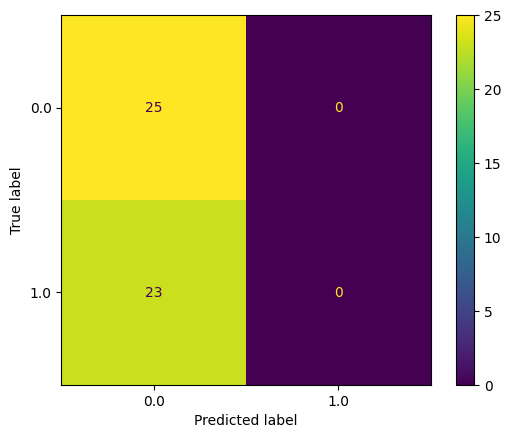

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

         0.0       0.52      1.00      0.68        25
         1.0       0.00      0.00      0.00        23

    accuracy                           0.52        48
   macro avg       0.26      0.50      0.34        48
weighted avg       0.27      0.52      0.36        48



/home/shaunakperni/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shaunakperni/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shaunakperni/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=1)

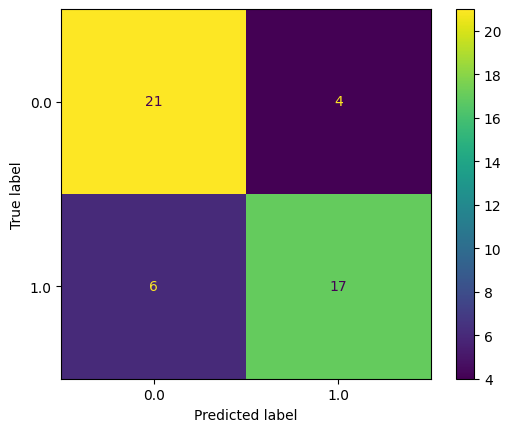

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.78      0.84      0.81        25
         1.0       0.81      0.74      0.77        23

    accuracy                           0.79        48
   macro avg       0.79      0.79      0.79        48
weighted avg       0.79      0.79      0.79        48



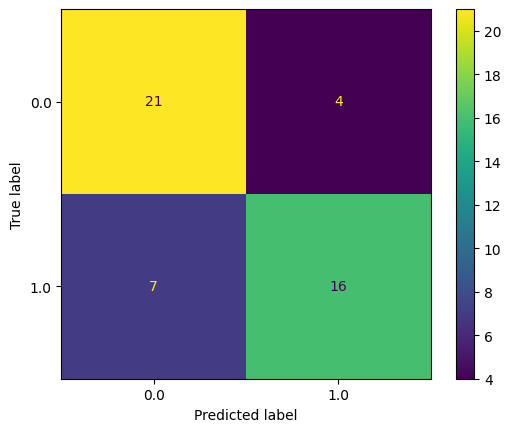

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.75      0.84      0.79        25
         1.0       0.80      0.70      0.74        23

    accuracy                           0.77        48
   macro avg       0.78      0.77      0.77        48
weighted avg       0.77      0.77      0.77        48



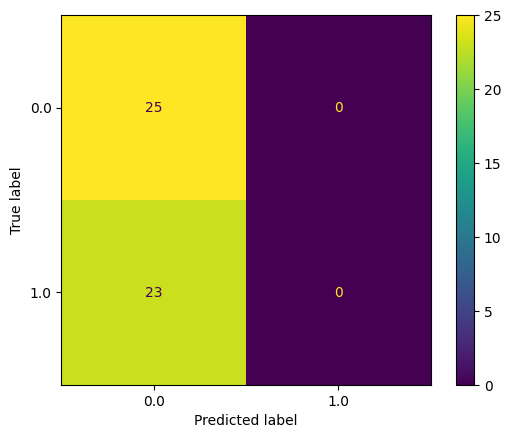

Classification Report for KNN:
              precision    recall  f1-score   support

         0.0       0.52      1.00      0.68        25
         1.0       0.00      0.00      0.00        23

    accuracy                           0.52        48
   macro avg       0.26      0.50      0.34        48
weighted avg       0.27      0.52      0.36        48



/home/shaunakperni/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shaunakperni/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/shaunakperni/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


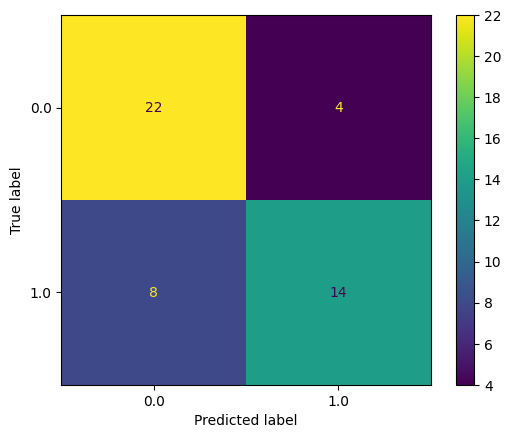

Classification Report for Linear SVM:
              precision    recall  f1-score   support

         0.0       0.73      0.85      0.79        26
         1.0       0.78      0.64      0.70        22

    accuracy                           0.75        48
   macro avg       0.76      0.74      0.74        48
weighted avg       0.75      0.75      0.75        48



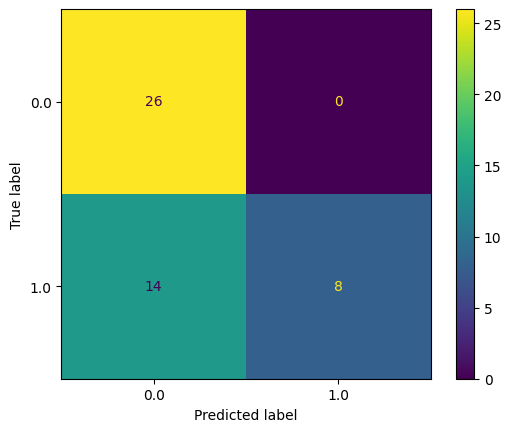

Classification Report for Poly SVM:
              precision    recall  f1-score   support

         0.0       0.65      1.00      0.79        26
         1.0       1.00      0.36      0.53        22

    accuracy                           0.71        48
   macro avg       0.82      0.68      0.66        48
weighted avg       0.81      0.71      0.67        48



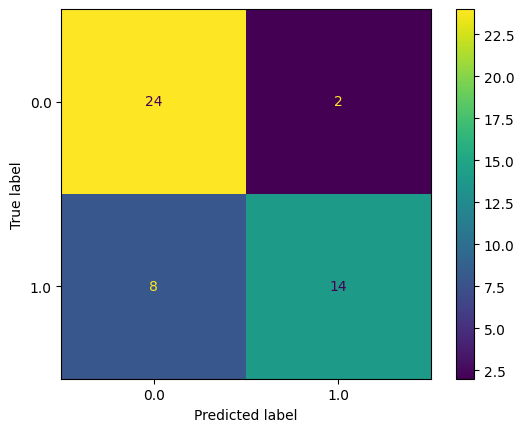

Classification Report for RBF SVM:
              precision    recall  f1-score   support

         0.0       0.75      0.92      0.83        26
         1.0       0.88      0.64      0.74        22

    accuracy                           0.79        48
   macro avg       0.81      0.78      0.78        48
weighted avg       0.81      0.79      0.79        48



In [22]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

modelsScaled = {
    "Linear SVM": svm_A_liner,
    "Poly SVM": svm_A_poly,
    "RBF SVM": svm_A_rbf
}

models = {
    "Logistic Regression": log_A,
    "Random Forest": randF_A,
    "Gradient Boosting": gbc_A,
    "KNN" : knn
}

metrics_list = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    ps = precision_score(y_test,y_pred,zero_division=1)
    recall = recall_score(y_test,y_pred,zero_division=1)
    f1 = f1_score(y_test, y_pred,zero_division=1)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {name}:")
    print(report)
    
    metrics_list.append({'Model': name, 'Accuracy': acc, 'Precision': ps, 'Recall': recall, 'F1': f1})
    
for name, model in modelsScaled.items():
    y_pred = model.predict(X_testS)
    acc = accuracy_score(y_testS,y_pred)
    ps = precision_score(y_testS,y_pred)
    recall = recall_score(y_testS,y_pred)
    f1 = f1_score(y_testS, y_pred)
    cm = confusion_matrix(y_testS, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()
    report = classification_report(y_testS, y_pred)
    print(f"Classification Report for {name}:")
    print(report)
    
    metrics_list.append({'Model': name, 'Accuracy': acc, 'Precision': ps, 'Recall': recall, 'F1': f1})


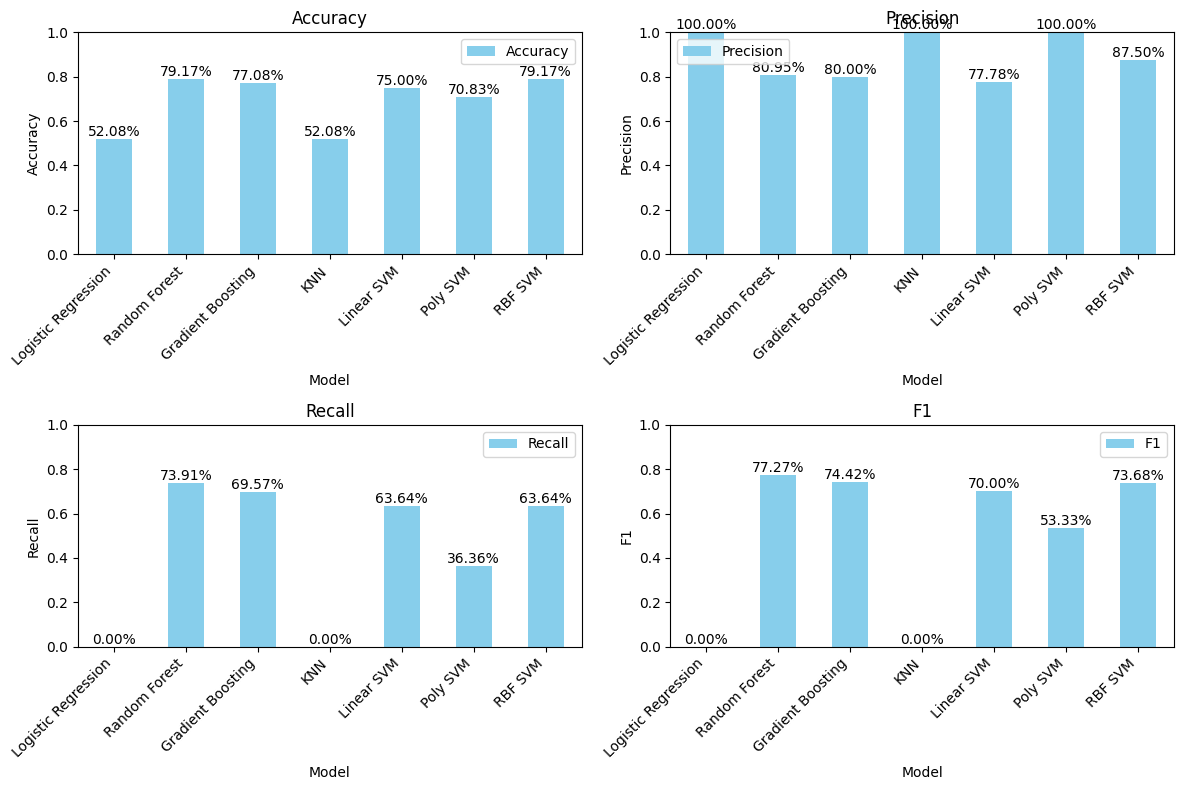

In [23]:
metrics_df = pandas.DataFrame(metrics_list)

# Plot bar charts for each metric
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1']
for i, metric in enumerate(metrics_to_plot):
    ax = axes[i // 2, i % 2]
    metrics_df.plot(kind='bar', x='Model', y=metric, ax=ax, color='skyblue')
    ax.set_title(metric)
    ax.set_ylabel(metric)
    ax.set_xlabel('Model')
    ax.set_xticklabels(metrics_df['Model'], rotation=45, ha='right')
    ax.set_ylim(0, 1)
    
    max_value = 1
    for p in ax.patches:
        percentage = p.get_height() / max_value * 100
        ax.annotate(f'{percentage:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

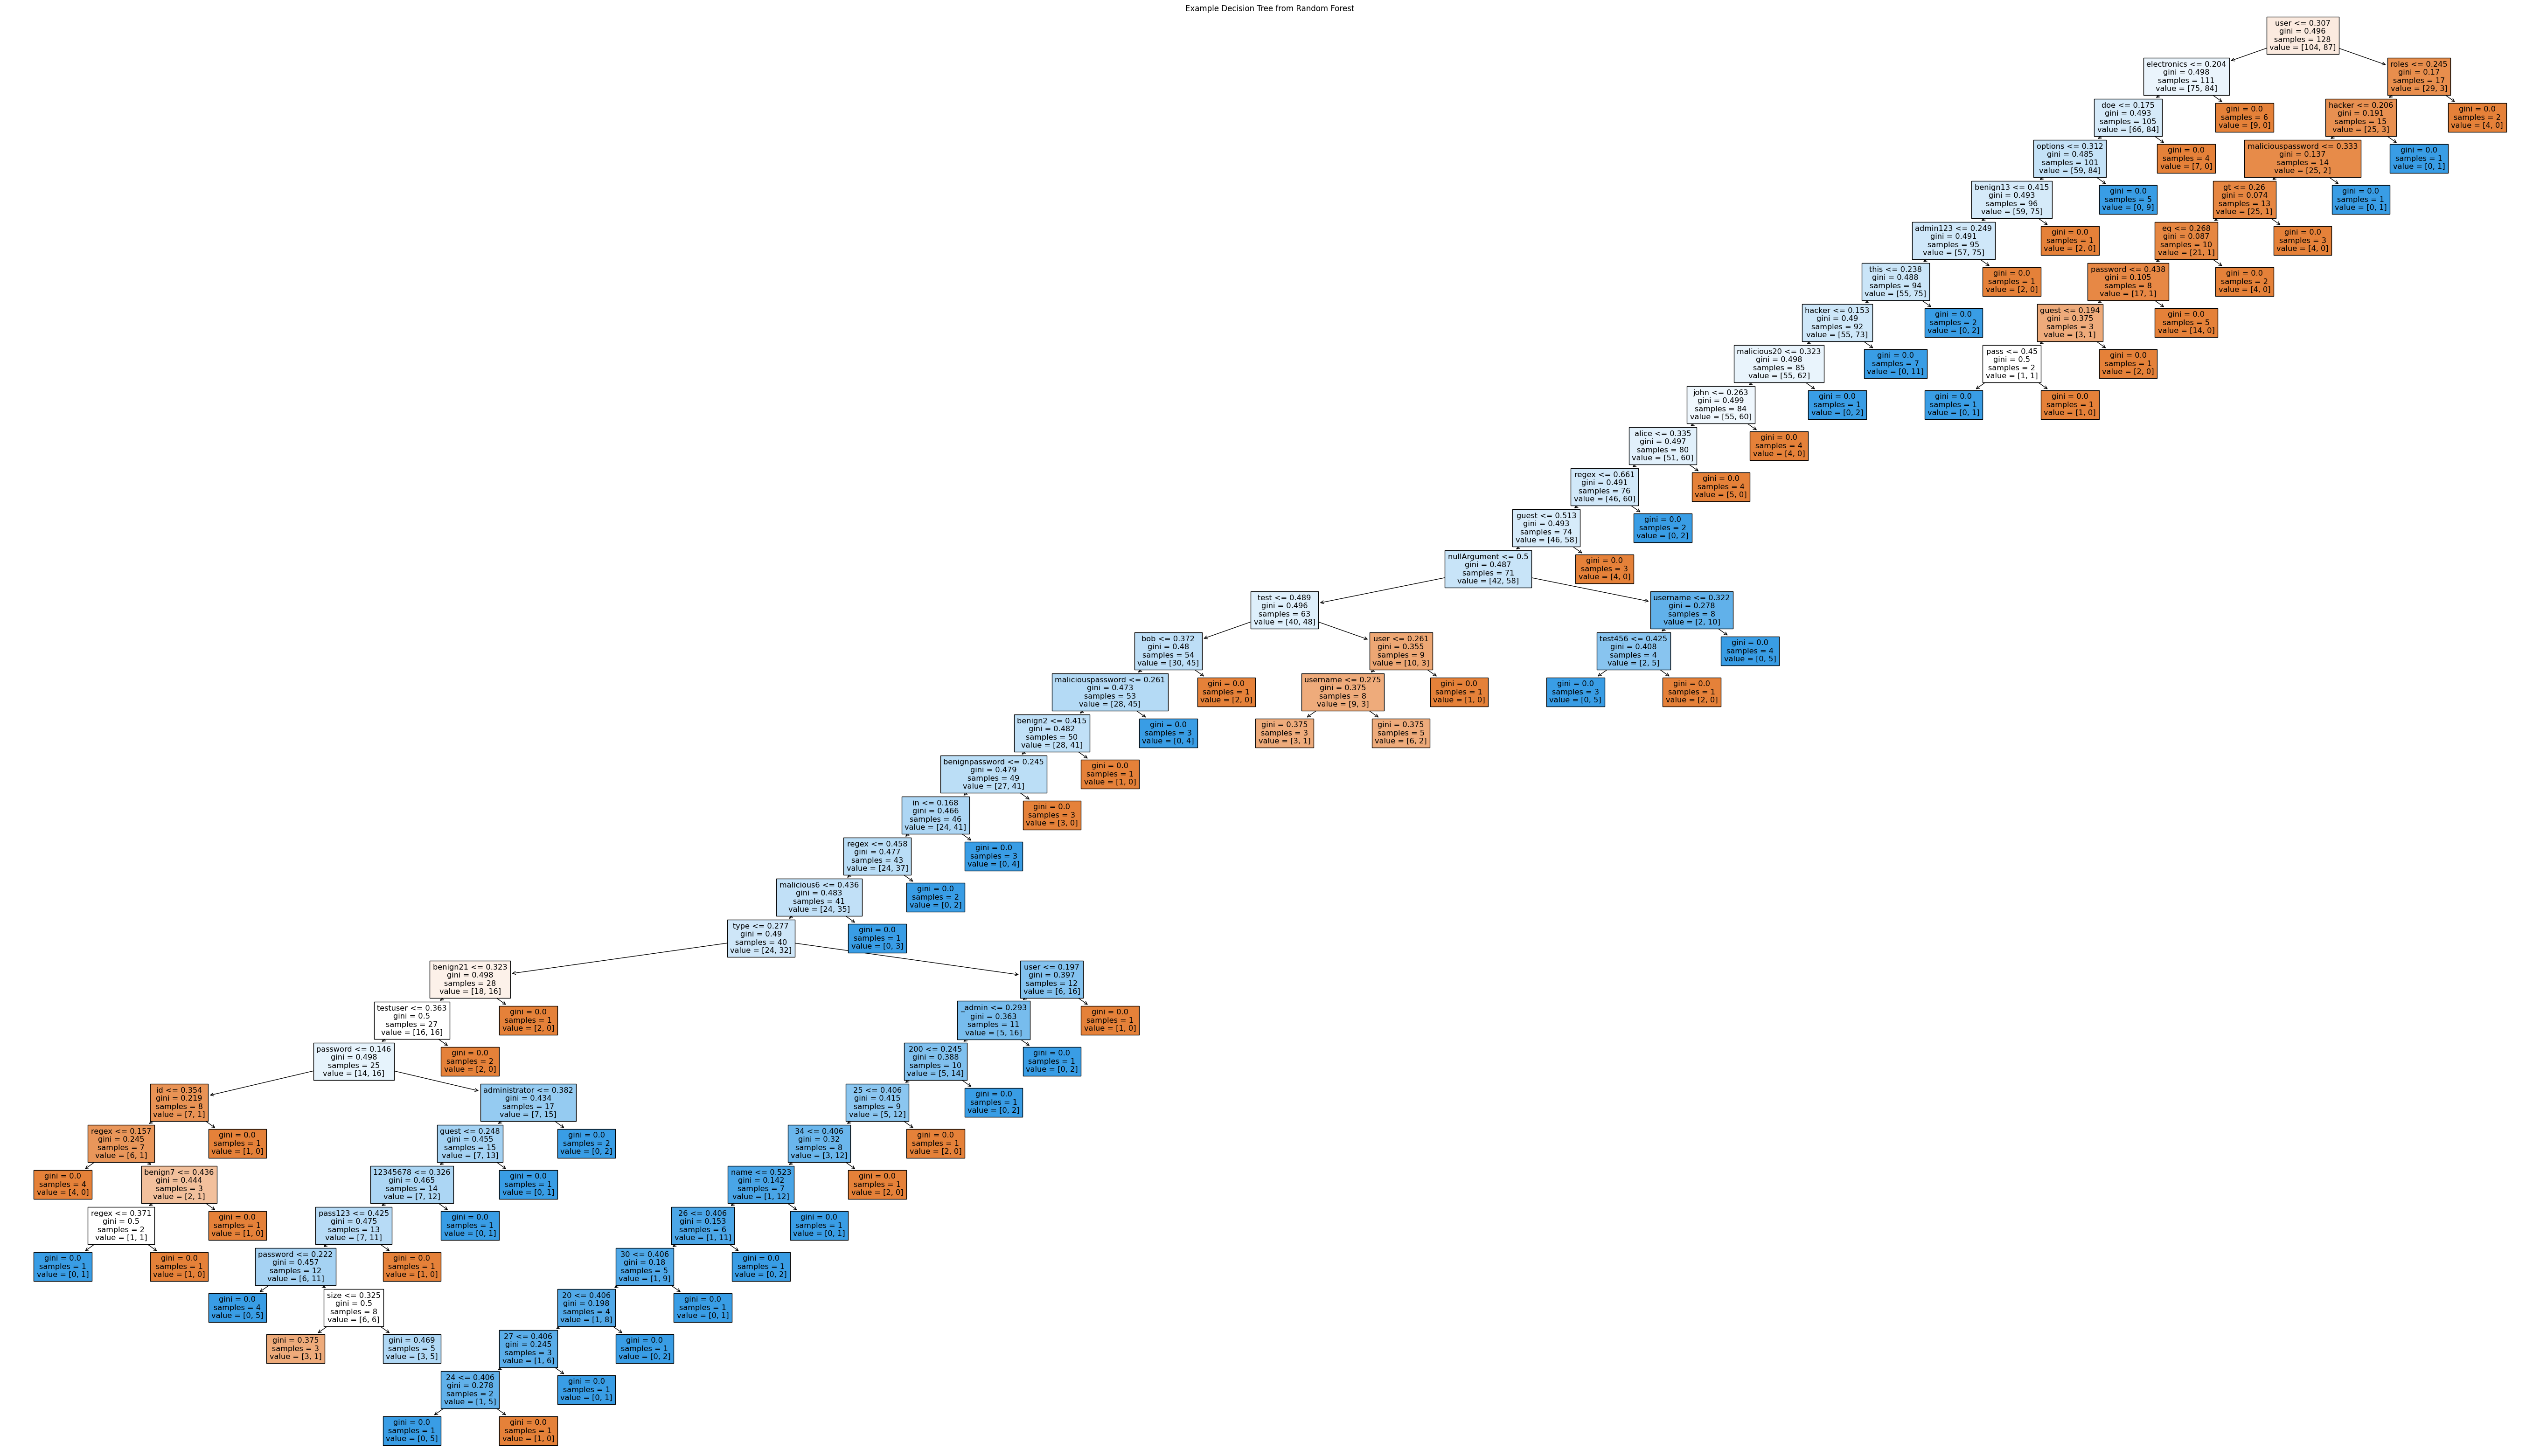

In [20]:
vectorized_feature_names = vectorizer.get_feature_names_out()
combined_feature_names = np.concatenate((vectorized_feature_names, ['ipHash', 'port', 'emptyFilter', 'regexDetected', 'whereDetected', 'nullArgument']))
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(70, 40))
plot_tree(randF_A.estimators_[0], filled=True, feature_names=combined_feature_names)
plt.title('Example Decision Tree from Random Forest')
plt.show()